In [1]:
install.packages('effects')
install.packages('multcomp')

Installing package into 'C:/Users/minel/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'effects' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minel\AppData\Local\Temp\Rtmp4Ox8rb\downloaded_packages


Installing package into 'C:/Users/minel/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'multcomp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\minel\AppData\Local\Temp\Rtmp4Ox8rb\downloaded_packages


In [2]:
library("rcompanion")
library("car")
library("effects")
library("multcomp")


Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser




In [3]:
graduate_admissions <- read.csv("C:/Users/minel/OneDrive/Documents/Entity Coursework/DSO105C (Oct 3 - Oct 23)/Lesson 8/graduate_admissions.csv")

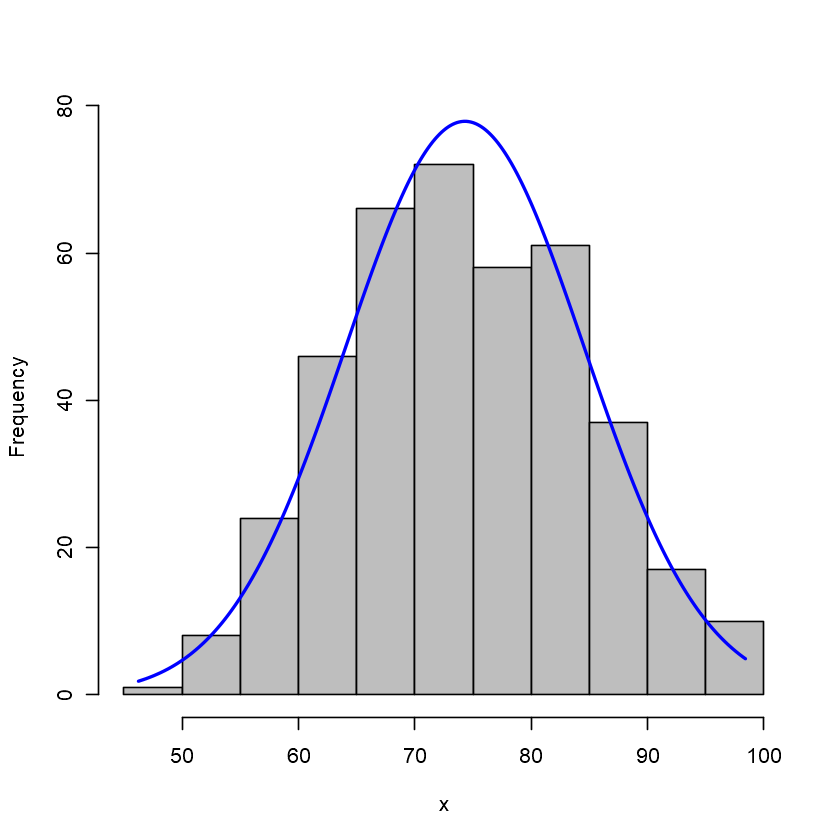

In [4]:
graduate_admissions$CGPAsq <- graduate_admissions$CGPA * graduate_admissions$CGPA
plotNormalHistogram(graduate_admissions$CGPAsq)

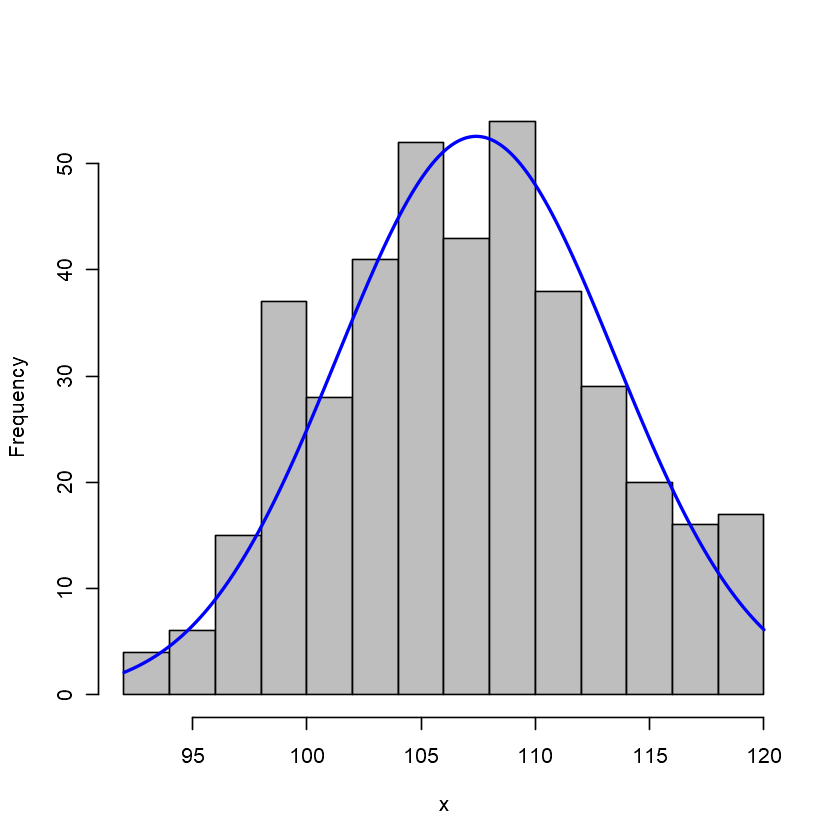

In [5]:
plotNormalHistogram(graduate_admissions$TOEFL.Score)

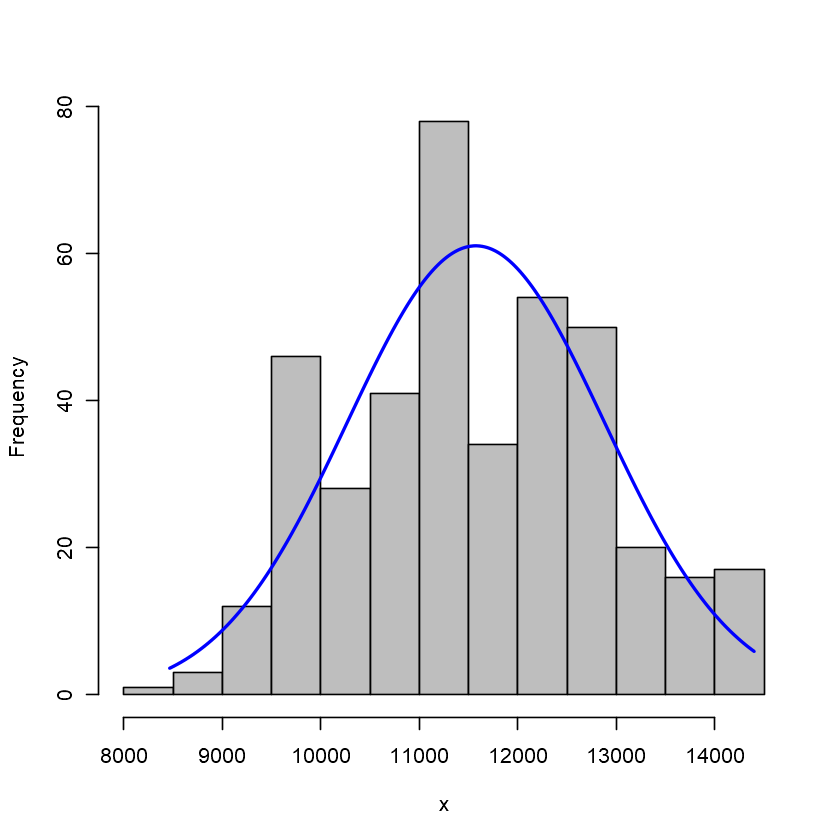

In [6]:
graduate_admissions$TOEFL.ScoreSQ <- graduate_admissions$TOEFL.Score * graduate_admissions$TOEFL.Score
plotNormalHistogram(graduate_admissions$TOEFL.ScoreSQ)

In [8]:
leveneTest(CGPAsq~University.Rating, data=graduate_admissions)

ERROR: Error in leveneTest.formula(CGPAsq ~ University.Rating, data = graduate_admissions): Levene's test is not appropriate with quantitative explanatory variables.


In [9]:
Homogeneity_RegrSlp = lm(CGPA~TOEFL.Score, data=graduate_admissions)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOEFL.Score,1,97.37016,97.3701552,870.6287,3.13431e-102
Residuals,398,44.51188,0.1118389,NA,NA


In [10]:
Homogeneity_RegrSlp = lm(CGPA~TOEFL.Score, data=graduate_admissions)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOEFL.Score,1,97.37016,97.3701552,870.6287,3.13431e-102
Residuals,398,44.51188,0.1118389,NA,NA


In [11]:
ANCOVA = lm(CGPA~TOEFL.Score + University.Rating*TOEFL.Score, data=graduate_admissions)
anova(ANCOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TOEFL.Score,1,97.3701552,97.37015522,1055.5662792,9.365522e-114
University.Rating,1,7.9665525,7.96655249,86.3634669,1.016218e-18
TOEFL.Score:University.Rating,1,0.0165187,0.01651870,0.1790753,6.723989e-01
Residuals,396,36.5288113,0.09224447,NA,NA


In [12]:
postHocs <- glht(ANCOVA,linfct=mcp(University.Rating = "Tukey"))
summary(postHocs)

ERROR: Error in mcp2matrix(model, linfct = linfct): Variable(s) 'University.Rating' of class 'integer' is/are not contained as a factor in 'model'.


In [13]:
adjMeans <- effect("University.Rating", ANCOVA)
adjMeans

NOTE: University.Rating is not a high-order term in the model




 University.Rating effect
University.Rating
       1        2        3        4        5 
8.236722 8.408108 8.579494 8.750881 8.922267 